In [265]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#http://www.chakoteya.net/DoctorWho/

In [3]:
def getinfo(rej): 
    if rej < 8:
        site=requests.get('http://www.chakoteya.net/DoctorWho/episodes{}.htm'.format(rej))
    else:
        site=requests.get('http://www.chakoteya.net/DoctorWho/episodes{}.html'.format(rej))
    soupy= BeautifulSoup(site.content,'html.parser')
    souplist= soupy.findAll('td', bgcolor = ['#eeeeee', '#eeeee'])

    things=[]
    
    for n,a in enumerate(souplist): #pulls all text info from boxes in the table
        things.append(a.get_text())
        for b in souplist[n].findAll('a'): #pulls url info in boxes
            url.append(b.get('href'))
    
    for n,thing in enumerate(things): #splits the info back into the three columns from the table
        if n%3==0:
            name.append(thing)
        elif n%3==1:
            prod.append(thing)
        else:
            airdate.append(thing)
            doctor.append(rej) #keeps track of which Doctor it is
            if rej < 9:
                era.append('Classic')
            else:
                era.append('New')

In [4]:
name=[]
name2=[]
url=[]
url2=[]
prod=[]
doctor=[]
airdate=[]
airdate2=[]
era = []

for rej in list(range(1,13)): #get info for all Doctors
    getinfo(rej)

In [5]:
#cleans up some of the data
url2= list(map(lambda x: 'http://www.chakoteya.net/DoctorWho/{}'.format(x), url))
url = url2

airdate2= list(map(lambda x: x.replace('\n',' '), airdate))
airdate=airdate2

name2 = list(map(lambda x: x.replace('\n',''), name))
name = name2

name2 = list(map(lambda x: x.replace(' The', 'The'), name))

In [6]:
#pull all episode transcripts from the urls in list(url)
texts=[]
for u in url:
    textsite= requests.get(u)
    print(textsite)
    textsoup= BeautifulSoup(textsite.content, 'html.parser')
    
    for script in textsoup.findAll('tbody'):
        texts.append(script.text)

        
#cleans up the text making it easier to read and more accurate later on when splitting by spaces
texts2 = list(map(lambda x: x.replace('\n', ' '), texts))
texts3 = list(map(lambda x: x.replace('.', '. '),texts2))
texts4 = list(map(lambda x: x.replace('?', '? '),texts3))
texts5 = list(map(lambda x: x.replace('!', '! '),texts4))

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [7]:
#removes anything in parenthases (mostly stage direction), or brackets (mostly location information) from the texts

def cleanscript(x):
    to_remove_paren = re.findall('[(][^)]*[)]', x)
    for item in to_remove_paren:
        x = x.replace(item,'')
    to_remove_bracket = re.findall('[[][^]]*[]]', x)
    for item in to_remove_bracket:
        x = x.replace(item,'')
    return x

In [8]:
texts6 = []

for a in texts5:
    texts6.append(cleanscript(a))

In [9]:
#for later, I wanted to be able to seperate the New Who era by showrunner so I created an additional column

showrunner = []

for n,x in enumerate(era):
    if x == 'New':
        if n<224:
            showrunner.append('Davies')
        else:
            showrunner.append('Moffat')
    else:
        showrunner.append(' ')

In [10]:
#for analysis, breaks down transcript into individual words and lines.

def textbreak(transcript):

    scriptwords = transcript.split()
    scriptlines=[]
    scriptplayers = []
    linecounts = {}
    linewordcount = {}

    for n, word in enumerate(scriptwords):
        try:
            if ':' in word: #if : is in the word, it is the name of the speaker
                num = 1
                while len(word)< 3: #sometimes there is a space between the name and the :, so this adjusts for that
                    word = (scriptwords[n-num]+word)
                    num = num+1
                if word == '10:': #When the name is DOCTOR 10:, this makes the name DOCTOR10:
                    word = (scriptwords[n-num]+word)
                else:
                    pass
                scriptline = word
            else:
                scriptline = scriptline + ' ' + word #builds the line word by word
                try:
                    if ':' in scriptwords[n+1]:
                        scriptlines.append(scriptline)
                    else:
                        pass
                except:
                    scriptlines.append(scriptline)
        except:
            pass
    for line in scriptlines:
        scriptplayers.append(line.split(' ', 1)[0]) #makes a list of just character names
    for player in scriptplayers:
        linecounts[player] = linecounts.get(player, 0) + 1 #counts all lines said by a given character
    for line in scriptlines: #counts the words each charachter says
        try:
            linewordcount[line.split(' ')[0]] = linewordcount[line.split(' ')[0]] + len(line.split(' ')) - 1
        except:
            linewordcount[line.split(' ')[0]] = len(line.split(' ')) - 1
        
    return scriptwords, scriptlines, scriptplayers, linecounts, linewordcount

In [11]:
scriptwords2= []
scriptlines2 = []
scriptplayers2 = []
linecounts2 = []
linewordcount2= []

for text in texts6:
    scriptwords2.append(textbreak(text)[0])
    scriptlines2.append(textbreak(text)[1])
    scriptplayers2.append(textbreak(text)[2])
    linecounts2.append(textbreak(text)[3])
    linewordcount2.append(textbreak(text)[4])

In [12]:
def normalize(v): #used to take into account that not all episodes are the same length
    y = {}
    raw = sum(v.values())
    factor = 1/raw
    
    for key in v.keys():
        y[key] = v[key]*factor
    return y

In [13]:
normline = []

for d in linecounts2:
    normline.append(normalize(d))

In [14]:
scriptlength = []

for n,script in enumerate(scriptwords2):
    scriptlength.append(len(scriptwords2[n]))

In [15]:
episodes = list(map(lambda x: round((x/4925.146667),0), scriptlength))

In [16]:
#I wanted to analyze the amount of lines a given character type speaks, broken down by Doctor, Companion and Other.

companionsite=requests.get('http://www.thedoctorwhosite.co.uk/doctorwho/characters/companions/')
compsoup= BeautifulSoup(companionsite.content, 'html.parser')
souplist= compsoup.findAll('h3')

complist = []

for d in souplist: #creates a list of companions
    complist.append((d.get_text()))
    
for n, name in enumerate(complist): #makes the list just first names
    complist[n] = complist[n].split()[0]
    
classiccomp=[]
newcomp=[]

for n,com in enumerate(complist): #splits that list into New and Old Companions
    if n <31:
        classiccomp.append(com)
    else:
        newcomp.append(com)
newcomp.append('Sarah')
newcomp.append('K-9')

for n,comp in enumerate(classiccomp): #makes the formatting the same as in the text
    classiccomp[n]= comp.upper() + ':'
for n,comp in enumerate(newcomp):
    newcomp[n]= comp.upper() + ':'
    
#Creates a list of all possible doctor names
doctors = ['DOCTOR:', 
          'DOCTOR1:',
          'DOCTOR2:',
          'DOCTOR3:',
          'DOCTOR4:',
          'DOCTOR5:',
          'DOCTOR6:',
          'DOCTOR7:',
          'DOCTOR8:',
          'DOCTOR9:',
          'DOCTOR10:',
          'DOCTOR11:',
          'DOCTOR12:',
          'DOCTOR13:']

In [17]:
playersbytype = []

for n, players in enumerate(scriptplayers2):
    playbytype = []
    if n < 160:
        for player in players:
            if player in classiccomp:
                playbytype.append('Companion')
            if player in doctors:
                playbytype.append('Doctor')
            else:
                playbytype.append('Other')
    else:
        for player in players:
            if player in newcomp:
                playbytype.append('Companion')
            if player in doctors:
                playbytype.append('Doctor')
            else:
                playbytype.append('Other')
    playersbytype.append(playbytype)

typecounts = []

for n,episode in enumerate(playersbytype):
    typecount = {'Doctor':0, 'Companion':0, 'Other':0}
    for category in playersbytype[n]:
        typecount[category] = typecount.get(category, 0) + 1
    typecounts.append(typecount)
    
normtypecounts = []

for e in typecounts:
    normtypecounts.append(normalize(e))

In [18]:
doctorpercent = []
otherpercent = []
companionpercent = []

for n, dic in enumerate(normtypecounts):
    for cat in dic.keys():
        if cat == 'Doctor':
            doctorpercent.append(normtypecounts[n]['Doctor'])
        if cat == 'Other':
            otherpercent.append(normtypecounts[n]['Other'])
        if cat == 'Companion':
            companionpercent.append(normtypecounts[n]['Companion'])

In [19]:
def countword(x):
    wordcount = []
    setofx = [x, x+'.', x+',', x+'!']
    for script in scriptwords2:
        scriptcount = 0
        for word in script:
            if word.lower() in setofx:
                scriptcount = scriptcount + 1
            else:
                pass
        wordcount.append(scriptcount) 
    return wordcount

In [20]:
def perepisode(x):
    pere = []
    for n,e in enumerate(x):
        try:
            pere.append(round((e/(episodes[n])),2))
        except:
            pere.append(0)
    return pere

In [21]:
soniccount= countword('sonic')
tardiscount= countword('tardis')
timecount=countword('time')
spacecount= countword('space')

soniccount = perepisode(soniccount)
tardiscount= perepisode(tardiscount)
timecount= perepisode(timecount)
spacecount= perepisode(spacecount)

In [22]:
columns= [era,
          doctor,
          prod,
          airdate,
          name2,
          url,
          texts6,
          showrunner,
          scriptwords2,
          scriptlines2,
          scriptplayers2,
          linecounts2,
          linewordcount2,
          normline,
          scriptlength,
          episodes,
          playersbytype,
          typecounts,
          normtypecounts,
          doctorpercent,
          otherpercent,
          companionpercent,
          soniccount,
          tardiscount,
          timecount,
          spacecount]

for n,x in enumerate(columns):
    print(n, len(x))

0 310
1 310
2 310
3 310
4 310
5 310
6 310
7 310
8 310
9 310
10 310
11 310
12 310
13 310
14 310
15 310
16 310
17 310
18 310
19 310
20 310
21 310
22 310
23 310
24 310
25 310


In [27]:
fulldata =pd.DataFrame({'era': era,
                    'doctor':doctor,
                    'prod':prod,
                    'airdate':airdate,
                    'name':name2,
                    'url':url,
                    'text':texts6,
                    'showrunner':showrunner,
                    'scriptwords':scriptwords2,
                    'scriptlines':scriptlines2,
                    'scriptplayers':scriptplayers2,
                    'linecounts':linecounts2,
                    'linewordcount':linewordcount2,
                    'linecountnormal':normline,
                    'scriptlength':scriptlength,
                    'episodes':episodes,
                    'playersbytype':playersbytype,
                    'typecounts':typecounts,
                    'normtypecounts':normtypecounts,
                    'doctorline%':doctorpercent,
                    'otherline%':otherpercent,
                    'companionline%':companionpercent,
                    'soniccount':soniccount,
                    'tardiscount':tardiscount,
                    'timecount':timecount,
                    'spacecount':spacecount})

fulldata = fulldata[fulldata.episodes != 0].reset_index().drop(columns='index')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 30)

fulldata

,era,doctor,prod,airdate,name,url,text,showrunner,scriptwords,scriptlines,scriptplayers,linecounts,linewordcount,linecountnormal,scriptlength,episodes,playersbytype,typecounts,normtypecounts,doctorline%,otherline%,companionline%,soniccount,tardiscount,timecount,spacecount
0,Classic,1,A,"23 Nov, 1963",An Unearthly Child,http://www.chakoteya.net/DoctorWho/1-1.htm,"GIRL: Night, Miss Wright. BARBARA...",,"[GIRL:, Night,, Miss, Wright., BARBARA:, Wait,...","[GIRL: Night, Miss Wright., BARBARA: Wait in h...","[GIRL:, BARBARA:, BOY:, IAN:, BARBARA:, IAN:, ...","{'GIRL:': 1, 'BARBARA:': 133, 'BOY:': 1, 'IAN:...","{'GIRL:': 3, 'BARBARA:': 1187, 'BOY:': 3, 'IAN...","{'GIRL:': 0.0012062726176115801, 'BARBARA:': 0...",9647,2.0,"[Other, Companion, Other, Other, Companion, Ot...","{'Doctor': 154, 'Companion': 465, 'Other': 675}","{'Doctor': 0.11901081916537867, 'Companion': 0...",0.119011,0.521638,0.359351,0.00,3.00,9.00,1.50
1,Classic,1,B,"21 Dec, 1963",The Daleks,http://www.chakoteya.net/DoctorWho/1-2.htm,Episode One - The Dead Planet DOCTOR:...,,"[Episode, One, -, The, Dead, Planet, DOCTOR:, ...","[DOCTOR: Well, I suggest before we go outside ...","[DOCTOR:, SUSAN:, DOCTOR:, SUSAN:, BARBARA:, I...","{'DOCTOR:': 274, 'SUSAN:': 205, 'BARBARA:': 22...","{'DOCTOR:': 3500, 'SUSAN:': 1777, 'BARBARA:': ...","{'DOCTOR:': 0.16882316697473815, 'SUSAN:': 0.1...",18480,4.0,"[Doctor, Companion, Other, Doctor, Companion, ...","{'Doctor': 274, 'Companion': 804, 'Other': 1349}","{'Doctor': 0.11289658014009064, 'Companion': 0...",0.112897,0.555830,0.331273,0.50,0.75,9.50,1.00
2,Classic,1,C,"8 Feb, 1964",The Edge Of Destruction,http://www.chakoteya.net/DoctorWho/1-3.htm,Episode One - The Edge of Destruction ...,,"[Episode, One, -, The, Edge, of, Destruction, ...",[BARBARA: Mister Chesterton? Ian Chesterton? I...,"[BARBARA:, SUSAN:, BARBARA:, SUSAN:, BARBARA:,...","{'BARBARA:': 120, 'SUSAN:': 90, 'IAN:': 105, '...","{'BARBARA:': 991, 'SUSAN:': 612, 'IAN:': 740, ...","{'BARBARA:': 0.2603036876355748, 'SUSAN:': 0.1...",4797,1.0,"[Companion, Other, Companion, Other, Companion...","{'Doctor': 146, 'Companion': 315, 'Other': 315}","{'Doctor': 0.18814432989690721, 'Companion': 0...",0.188144,0.405928,0.405928,0.00,2.00,14.00,1.00
3,Classic,1,D,"22 Feb, 1964",Marco Polo,http://www.chakoteya.net/DoctorWho/1-4.htm,Episode One - The Roof Of The World ...,,"[Episode, One, -, The, Roof, Of, The, World, S...",[SUSAN: Must've been made by a giant. What do ...,"[SUSAN:, IAN:, SUSAN:, IAN:, DOCTOR:, SUSAN:, ...","{'SUSAN:': 192, 'IAN:': 251, 'DOCTOR:': 230, '...","{'SUSAN:': 1291, 'IAN:': 2193, 'DOCTOR:': 2501...","{'SUSAN:': 0.11408199643493762, 'IAN:': 0.1491...",18908,4.0,"[Companion, Other, Companion, Other, Companion...","{'Doctor': 230, 'Companion': 580, 'Other': 1453}","{'Doctor': 0.10163499779054352, 'Companion': 0...",0.101635,0.642068,0.256297,0.00,7.50,8.00,0.00
4,Classic,1,E,"11 Apr, 1964",The Keys of Marinus,http://www.chakoteya.net/DoctorWho/1-5.htm,Episode One - The Sea Of Death IAN:...,,"[Episode, One, -, The, Sea, Of, Death, IAN:, A...","[IAN: Any radiation, Doctor?, DOCTOR: No, noth...","[IAN:, DOCTOR:, BARBARA:, DOCTOR:, BARBARA:, D...","{'IAN:': 298, 'DOCTOR:': 183, 'BARBARA:': 308,...","{'IAN:': 2973, 'DOCTOR:': 2642, 'BARBARA:': 26...","{'IAN:': 0.22090437361008153, 'DOCTOR:': 0.135...",16222,3.0,"[Companion, Other, Doctor, Companion, Other, D...","{'Doctor': 183, 'Companion': 741, 'Other': 1166}","{'Doctor': 0.0875598086124402, 'Companion': 0....",0.087560,0.557895,0.354545,0.00,0.33,6.33,1.33
5,Classic,1,F,"23 May, 1964",The Aztecs,http://www.chakoteya.net/DoctorWho/1-6.htm,Episode One - The Temple of Evil B...,,"[Episode, One, -, The, Temple, of, Evil, BARBA...","[BARBARA: Look at that., SUSAN: I am., BARBARA...","[BARBARA:, SUSAN:, BARBARA:, SUSAN:, BARBARA:,...","{'BARBARA:': 173, 'SUSAN:': 60, 'AUTLOC:': 118...","{'BARBARA:': 1568, 'SUSAN:': 463, 'AUTLOC:': 1...","{'BARBARA:': 0.16351606805293006, 'SUSAN:': 0....",10958,2.0,"[Companion, Other, 

In [28]:
sns.set(style="darkgrid")

In [ ]:
fulldata

In [ ]:
labels = normline[0].keys()
sizes = normline[0].values()
 
# Plot
plt.pie(sizes, labels=labels)
 
plt.axis('equal')
plt.show()


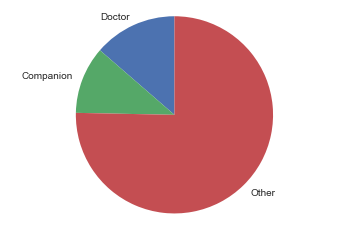

In [29]:
labels = typecounts[50].keys()
sizes = typecounts[50].values()
 
# Plot
plt.pie(sizes, labels=labels, startangle=90)
 
plt.axis('equal')
plt.show()

In [30]:
fulldata['doctorline%'] = fulldata['doctorline%'].map(lambda x:x*100)
fulldata['otherline%'] = fulldata['otherline%'].map(lambda x:x*100)
fulldata['companionline%'] = fulldata['companionline%'].map(lambda x:x*100)

In [32]:
perbydoc=fulldata.groupby('doctor').mean()
perbydoc

,scriptlength,episodes,doctorline%,otherline%,companionline%,soniccount,tardiscount,timecount,spacecount
doctor,,,,,,,,,
1,12852.178571,2.535714,12.988051,60.077168,26.934782,0.029643,3.380714,12.151786,1.728929
2,15633.047619,3.095238,16.424797,64.932534,18.642669,0.190000,2.630952,11.721429,2.917619
3,13830.333333,2.833333,20.831231,67.173231,11.995538,0.378333,2.537917,13.940417,2.350417
4,9811.261905,2.023810,23.820312,60.911016,15.268672,0.309286,3.277857,16.480238,2.234286
5,8603.650000,1.800000,21.215592,61.716540,17.067868,0.325000,10.725000,16.725000,1.100000
6,10564.090909,2.090909,23.540276,65.347649,11.112075,0.136364,4.332727,17.454545,1.136364
7,8567.666667,1.833333,23.345202,63.826361,12.828438,0.083333,2.041667,14.875000,1.958333
8,6624.000000,1.000000,29.527559,70.472441,0.000000,2.000000,14.000000,37.000000,3.000000
9,4678.538462,1.000000,20.769755,56.622583,22.607662,1.000000,3.538462,11.769231,2.692308


In [42]:
perbydoc2 = perbydoc.drop(columns= ['scriptlength', 'episodes', 'soniccount', 'tardiscount', 'timecount', 'spacecount'])

In [45]:
perbyera= fulldata.groupby('era').mean()

In [46]:
perbyera= perbyera.drop(columns= 'doctor')

<BarContainer object of 12 artists>

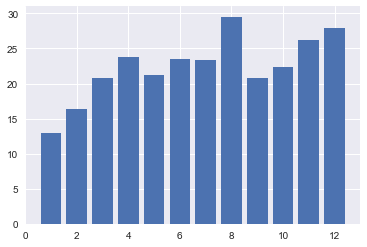

In [40]:
plt.figure(0)
plt.bar(perbydoc.index,perbydoc['doctorline%'])

TypeError: 'bool' object is not callable

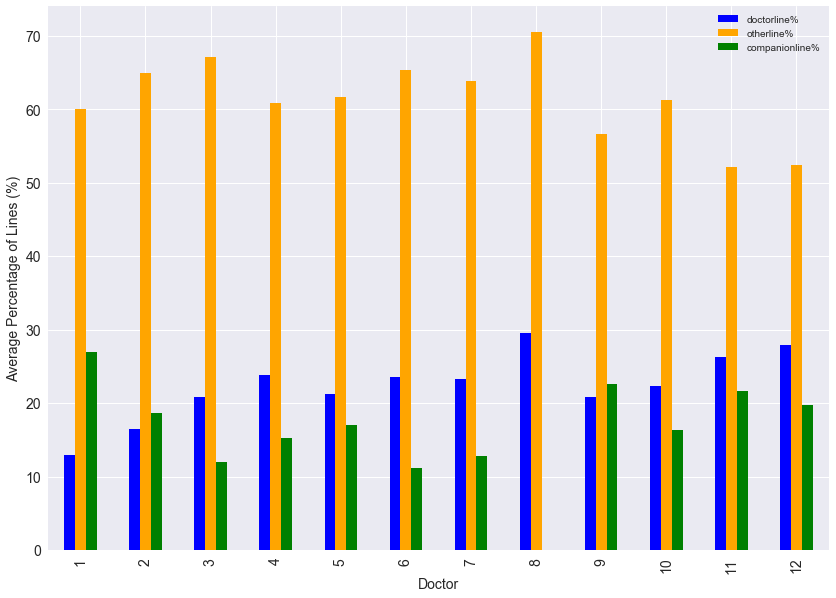

In [262]:
perbydoc2.plot(kind='bar', figsize=(14,10), color= ['blue', 'orange', 'green'], fontsize=14)
plt.ylabel('Average Percentage of Lines (%)', fontsize=14)
plt.xlabel('Doctor', fontsize=14)
plt.legend(['Doctor', 'Other', 'Companion'], fontsize=14)
plt.title('Average Line Percentages by Doctor', fontsize=18)
plt.xticks(rotation=0)




In [47]:
perbyera= perbyera.reset_index()

(-1.1021311096405033,
 1.1106738023490796,
 -1.1089149533326845,
 1.1004245215872708)

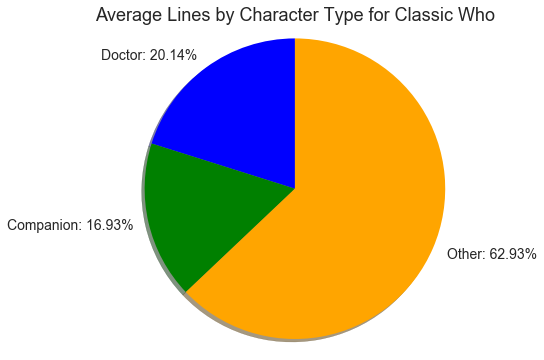

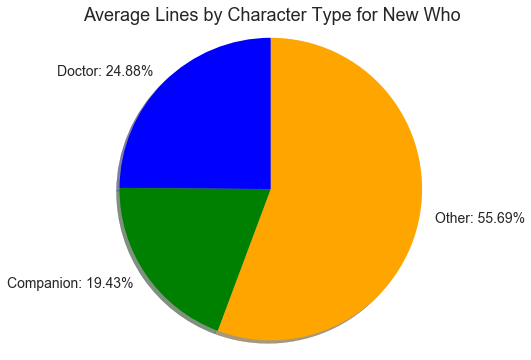

In [51]:
labelsclass = ['Doctor:' + ' ' + str(round(perbyera['doctorline%'][0],2))+'%',
          'Companion:'+ ' ' + str(round(perbyera['companionline%'][0],2))+'%',
          'Other:'+ ' ' + str(round(perbyera['otherline%'][0],2))+'%']
labelsnew = ['Doctor:' + ' ' + str(round(perbyera['doctorline%'][1],2))+'%',
          'Companion:'+ ' ' + str(round(perbyera['companionline%'][1],2))+'%',
          'Other:'+ ' ' + str(round(perbyera['otherline%'][1],2))+'%']
sizesnew = [perbyera['doctorline%'][1], perbyera['companionline%'][1], perbyera['otherline%'][1]]
sizes = [perbyera['doctorline%'][0], perbyera['companionline%'][0], perbyera['otherline%'][0]]
colors= ['blue', 'green', 'orange']
 
# Plot
plt.figure(0).set_size_inches(6,6)
plt.pie(sizes, labels=labelsclass, startangle=90, colors=colors, shadow=True, textprops={'fontsize': 14})
plt.title('Average Lines by Character Type for Classic Who',  fontsize=18)
plt.axis('equal')

plt.figure(1).set_size_inches(6,6)
plt.pie(sizesnew, labels=labelsnew, startangle=90, colors=colors, shadow=True, textprops={'fontsize': 14})
plt.title('Average Lines by Character Type for New Who',  fontsize=18)
plt.axis('equal')

In [52]:
byshowrunner=fulldata.groupby('showrunner').mean().drop(columns='doctor')

byshowrunner

,scriptlength,episodes,doctorline%,otherline%,companionline%,soniccount,tardiscount,timecount,spacecount
showrunner,,,,,,,,,
,11508.616352,2.333333,20.137822,62.928980,16.933198,0.238302,4.082704,14.812201,2.018428
Davies,5087.145161,1.000000,21.983570,60.330194,17.686236,0.677419,3.290323,14.435484,2.193548
Moffat,5002.523810,1.035714,27.013445,52.265350,20.721204,0.767857,5.053571,15.601190,2.511905


(-1.1107787433713137,
 1.1080900548692405,
 -1.1098336662233297,
 1.1004682832881216)

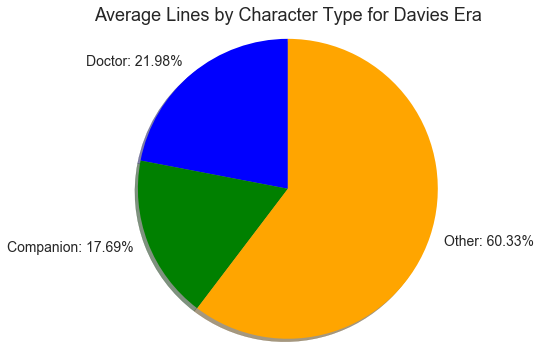

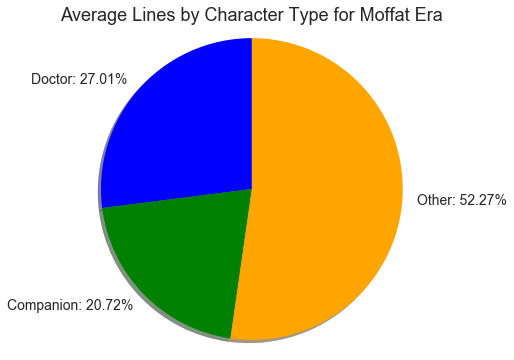

In [53]:
labelsdavies = ['Doctor:' + ' ' + str(round(byshowrunner['doctorline%'][1], 2))+'%',
          'Companion:'+ ' ' + str(round(byshowrunner['companionline%'][1], 2))+'%',
          'Other:'+ ' ' + str(round(byshowrunner['otherline%'][1], 2))+'%']
labelsmoffat = ['Doctor:' + ' ' + str(round(byshowrunner['doctorline%'][2], 2))+'%',
          'Companion:'+ ' ' + str(round(byshowrunner['companionline%'][2], 2))+'%',
          'Other:'+ ' ' + str(round(byshowrunner['otherline%'][2], 2))+'%']
sizesmoffat = [byshowrunner['doctorline%'][2], byshowrunner['companionline%'][2], byshowrunner['otherline%'][2]]
sizesdavies = [byshowrunner['doctorline%'][1], byshowrunner['companionline%'][1], byshowrunner['otherline%'][1]]
colors= ['blue', 'green', 'orange']
 
# Plot
plt.figure(0).set_size_inches(6,6)
plt.pie(sizesdavies, labels=labelsdavies, startangle=90, colors=colors, shadow=True, textprops={'fontsize': 14})
plt.title('Average Lines by Character Type for Davies Era', fontsize=18)
plt.axis('equal')

plt.figure(1).set_size_inches(6,6)
plt.pie(sizesmoffat, labels=labelsmoffat, startangle=90, colors=colors, shadow=True, textprops={'fontsize': 14})
plt.title('Average Lines by Character Type for Moffat Era', fontsize=18)
plt.axis('equal')

In [112]:
totalepisodecount = {}

for n, episode in enumerate(fulldata.linecounts):
    for character in episode:
        if character in totalepisodecount.keys(): 
            totalepisodecount[character] = totalepisodecount[character] + fulldata.episodes[n]
        else:
            totalepisodecount[character] = fulldata.episodes[n]

In [113]:
companionepisodes= {}

for character in totalepisodecount:
    if character in classiccomp:
        companionepisodes[character] = totalepisodecount[character]
    if character in newcomp:
        companionepisodes[character] = totalepisodecount[character]

In [114]:
len(companionepisodes)

38

In [115]:
totallinecount = {}

for episode in fulldata.linecounts:
    for character in episode:
        if character in totallinecount.keys(): 
            totallinecount[character] = totallinecount[character] + episode[character]
        else:
            totallinecount[character] = episode[character]

In [116]:
companionlines= {}
totaldoctorlines= {'doctor':0}

for character in totallinecount:
    if character in classiccomp:
        companionlines[character] = totallinecount[character]
    if character in newcomp:
        companionlines[character] = totallinecount[character]
    if character in doctor:
        totaldoctorlines['doctor'] = totaldoctorlines['doctor'] + totallinecount[character]

In [91]:
len(companionepisodes)

38

In [ ]:
normalcomp=normalize(companionlines)

In [117]:
compnames = list(companionlines.keys())
compval = list(companionlines.values())
compep= list(companionepisodes.values())

compdf =pd.DataFrame({'companions': compnames, 'lines': compval, 'episodes': compep})

{'DOCTOR:': 652,
 'SUSAN:': 27,
 'BARBARA:': 30,
 'IAN:': 40,
 'DALEK:': 101,
 'DALEK1:': 22,
 'DALEK2:': 61,
 'ALL:': 126,
 'ALYDON:': 4,
 'MAN:': 278,
 'GANATUS:': 4,
 'TEMMOSUS:': 4,
 'DYONI:': 4,
 'DALEK3:': 43,
 'ELYON:': 4,
 'THAL:': 7,
 'THAL2:': 4,
 'ANTODUS:': 4,
 'KRISTAS:': 4,
 '[OC[:': 4,
 'TEGANA:': 4,
 'POLO:': 4,
 'PING-CHO:': 4,
 'MALIK:': 4,
 'ACOMAT:': 4,
 'CHENCHU:': 4,
 'MONGOL:': 4,
 'LING-TAU:': 4,
 'WANG-LO:': 4,
 'KUIJU:': 4,
 'DRIVER:': 41,
 'VIZIER:': 4,
 'KHAN:': 4,
 'EMPRESS:': 7,
 'ARBITAN:': 3,
 'ALTOS:': 3,
 'MORPHO:': 3,
 'SABETHA:': 3,
 'DARRIUS:': 3,
 'VASAR:': 3,
 'TARRON:': 3,
 'CLERK:': 3,
 'JUDGE:': 6,
 'EYESEN:': 3,
 'KALA:': 3,
 'AYDEN:': 3,
 'AYSEN:': 3,
 'YARTEK:': 3,
 'VOORD:': 3,
 'MAITLAND:': 4,
 'CAROL:': 4,
 'JOHN:': 10,
 'SENSORITE1:': 4,
 'SENSORITE2:': 4,
 'ELDER:': 7,
 'ADMINISTRATOR:': 7,
 'ENGINEER:': 13,
 'SCIENTIST:': 17,
 'SCIENTIST2:': 4,
 'WARRIOR:': 16,
 'BOTH:': 67,
 'MAN1:': 7,
 'MAN2:': 43,
 'COMMANDER:': 27,
 'PIERRE:': 3,


In [126]:
compdf = compdf.set_index('companions')

KeyError: 'companions'

In [269]:
len(list(compdf.index))

38

In [138]:
neworclassic = []
for companion in list(compdf.index):
    if companion in classiccomp:
        neworclassic.append('Classic')
    else:
        neworclassic.append('New')
        
compdf['era'] = neworclassic

In [213]:
lpe = []

for n,comp in enumerate(compdf.lines):
    lpe.append((compdf.lines[n])/(compdf.episodes[n]))

compdf['lpe'] = lpe

In [218]:
compdf = compdf.sort_values('lpe', ascending = False)

In [256]:
import matplotlib.patches as mpatches

Text(0.5,1,'Top 12 Companions by Lines per Episode')

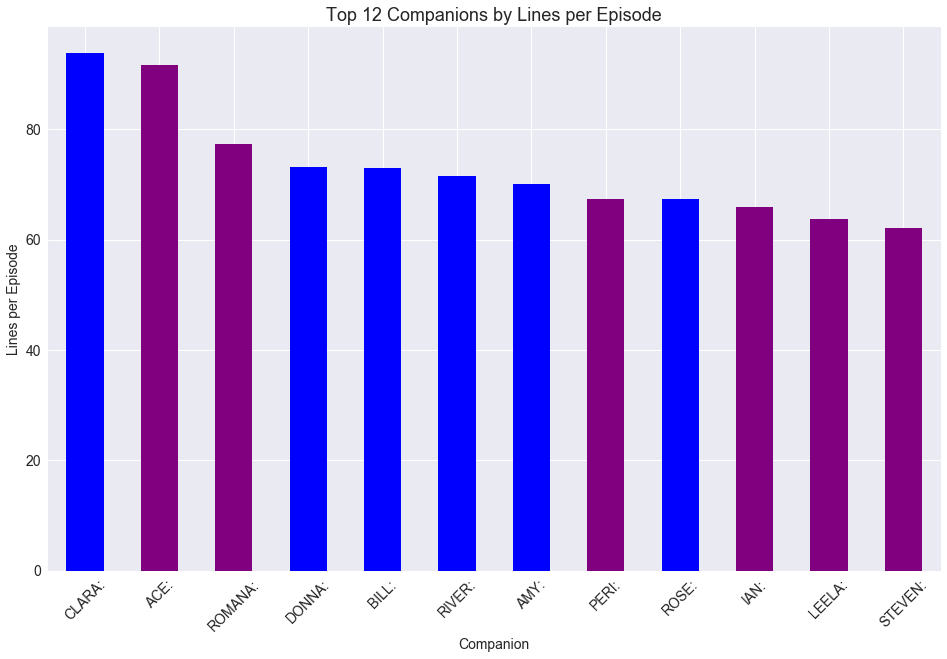

In [272]:
compdf.lpe.head(12).plot(kind = 'bar', fontsize=14, figsize=(16,10), 
                         color= ['blue', 'purple', 'purple', 'blue', 
                                 'blue', 'blue', 'blue', 'purple', 'blue', 'purple', 'purple', 'purple'])
plt.xticks(rotation=45)
plt.ylabel('Lines per Episode', fontsize=14)
plt.xlabel('Companion', fontsize=14)
plt.title('Top 12 Companions by Lines per Episode', fontsize=18)
#classic_patch = mpatches.Patch(color='purple', label='Classic Era')
#new_patch = mpatches.Patch(color='blue', label='New Era')

In [144]:
classicdf= compdf[compdf.era == 'Classic']
newdf= compdf[compdf.era == 'New']
#fulldata = fulldata[fulldata.episodes != 0].reset_index().drop(columns='index')

In [209]:
nlpe = []

for n,comp in enumerate(newdf.lines):
    nlpe.append((newdf.lines[n])/(newdf.episodes[n]))

newdf['lpe'] = nlpe

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [210]:
nlpe

[93.8048780487805,
 73.0,
 62.0,
 43.53846153846154,
 67.375,
 30.875,
 73.16666666666667,
 71.5625,
 48.18518518518518,
 70.05714285714286,
 35.75]

In [280]:
compdf

,lines,episodes,era,lpe
companions,,,,
CLARA:,3846,41.0,New,93.804878
ACE:,1466,16.0,Classic,91.625000
ROMANA:,2786,36.0,Classic,77.388889
DONNA:,1317,18.0,New,73.166667
BILL:,1387,19.0,New,73.000000
RIVER:,1145,16.0,New,71.562500
AMY:,2452,35.0,New,70.057143
PERI:,1618,24.0,Classic,67.416667
ROSE:,2156,32.0,New,67.375000


Text(0.5,1,'Companion Lines Spoken vs Episodes Featured ')

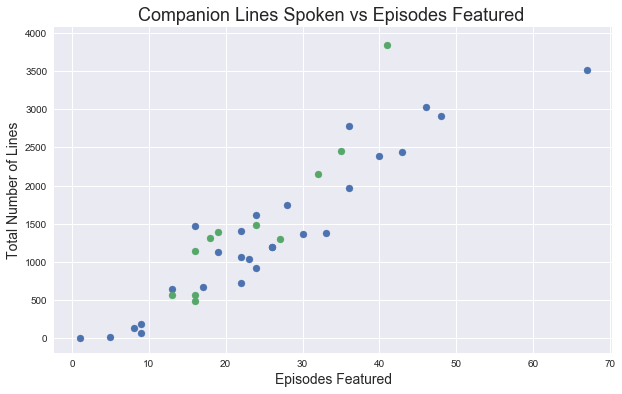

In [165]:
plt.figure(0).set_size_inches(10,6)
plt.scatter(classicdf['episodes'], classicdf['lines'])
plt.scatter(newdf['episodes'], newdf['lines'])
plt.ylabel('Total Number of Lines', fontsize=14)
plt.xlabel('Episodes Featured', fontsize=14)
plt.title('Companion Lines Spoken vs Episodes Featured ', fontsize=18)

In [95]:
#complines = complines.sort_values('lines', ascending=False).reset_index()

In [96]:
#top10comp= complines.head(10)

In [59]:
#top10comp= top10comp.set_index('companions').drop(columns='index')

In [119]:
#top10comp.plot(kind='bar', figsize=(12,10), legend=False, fontsize=14)
#plt.ylabel('Total Number of Lines', fontsize=14)
#plt.xlabel('Companion', fontsize=14)
#plt.xticks(rotation=45)
#plt.title('Top 10 Companions by Number of Lines', fontsize=18)

Text(0.5,1,'Average Use of the Word Sonic per Episode')

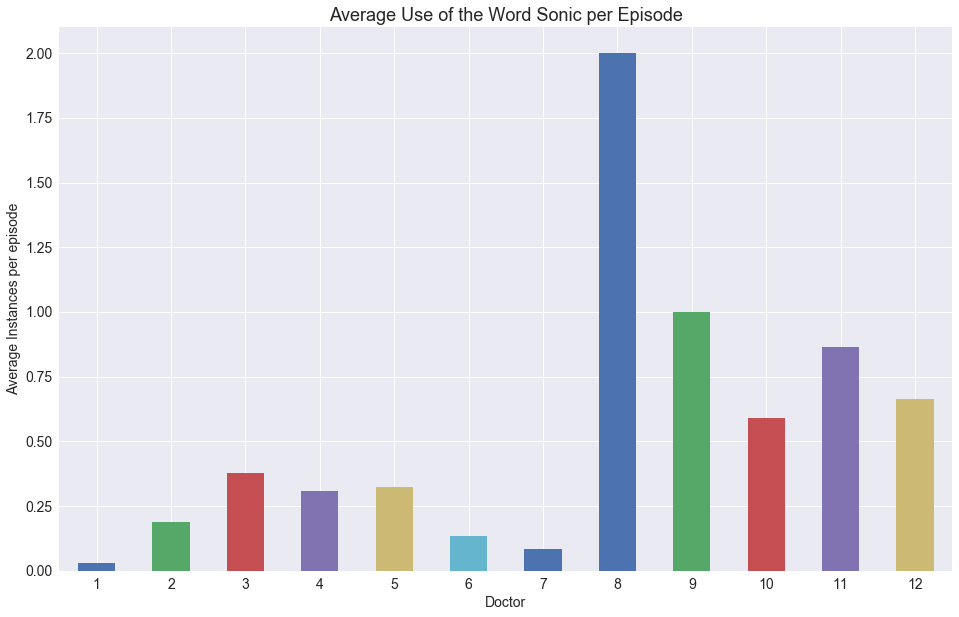

In [273]:
perbydoc['soniccount'].plot(kind='bar', figsize=(16,10), legend=False, fontsize=14)
plt.ylabel('Average Instances per episode', fontsize=14)
plt.xlabel('Doctor', fontsize=14)
plt.xticks(rotation=0)
plt.title('Average Use of the Word Sonic per Episode', fontsize=18)

In [181]:
perbydoc

,scriptlength,episodes,doctorline%,otherline%,companionline%,soniccount,tardiscount,timecount,spacecount
doctor,,,,,,,,,
1,12852.178571,2.535714,12.988051,60.077168,26.934782,0.029643,3.380714,12.151786,1.728929
2,15633.047619,3.095238,16.424797,64.932534,18.642669,0.190000,2.630952,11.721429,2.917619
3,13830.333333,2.833333,20.831231,67.173231,11.995538,0.378333,2.537917,13.940417,2.350417
4,9811.261905,2.023810,23.820312,60.911016,15.268672,0.309286,3.277857,16.480238,2.234286
5,8603.650000,1.800000,21.215592,61.716540,17.067868,0.325000,10.725000,16.725000,1.100000
6,10564.090909,2.090909,23.540276,65.347649,11.112075,0.136364,4.332727,17.454545,1.136364
7,8567.666667,1.833333,23.345202,63.826361,12.828438,0.083333,2.041667,14.875000,1.958333
8,6624.000000,1.000000,29.527559,70.472441,0.000000,2.000000,14.000000,37.000000,3.000000
9,4678.538462,1.000000,20.769755,56.622583,22.607662,1.000000,3.538462,11.769231,2.692308


In [278]:
docspacetime['Time'] = docspacetime['timecount']
docspacetime['Space'] = docspacetime['spacecount']

docspacetime = docspacetime.drop(columns= ['timecount', 'spacecount'])
docspacetime

,Time,Space
doctor,,
1,12.151786,1.728929
2,11.721429,2.917619
3,13.940417,2.350417
4,16.480238,2.234286
5,16.725000,1.100000
6,17.454545,1.136364
7,14.875000,1.958333
8,37.000000,3.000000
9,11.769231,2.692308


In [189]:
docspacetime = perbydoc.drop(columns = ['scriptlength', 'episodes', 'doctorline%', 'otherline%', 'companionline%', 'soniccount', 'tardiscount'])

Text(0.5,1,'Average Use of the Words Time and Space per Episode')

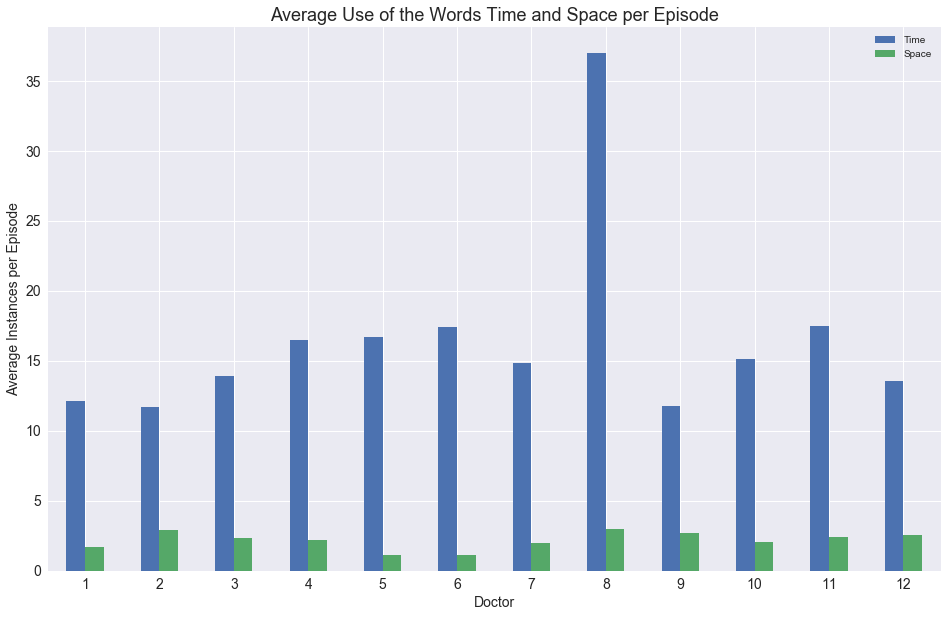

In [279]:
docspacetime.plot(kind='bar', figsize=(16,10), fontsize=14, legend=True)
#perbydoc['spacecount'].plot(kind='bar', figsize=(12,10), legend=False, fontsize=14)
#plt.bar(list(perbydoc.index), perbydoc['timecount'])
#plt.bar(list(perbydoc.index), perbydoc['spacecount'])
plt.ylabel('Average Instances per Episode', fontsize=14)
plt.xlabel('Doctor', fontsize=14)
plt.xticks(rotation=0)
plt.title('Average Use of the Words Time and Space per Episode', fontsize=18)

Text(0.5,1,'Average Use of the Word TARDIS per Episode')

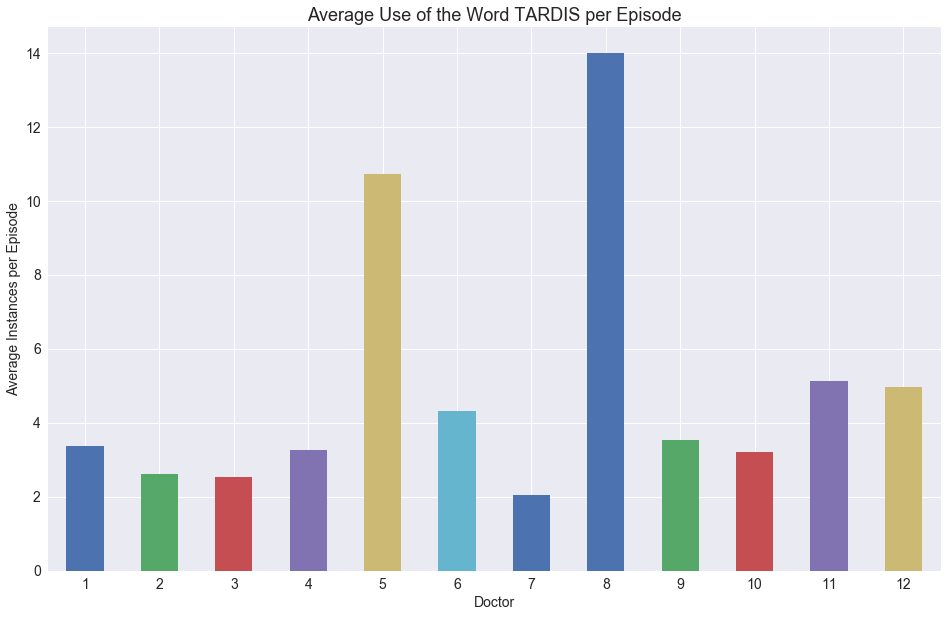

In [274]:
perbydoc['tardiscount'].plot(kind='bar', figsize=(16,10), legend=False, fontsize=14)
plt.ylabel('Average Instances per Episode', fontsize=14)
plt.xlabel('Doctor', fontsize=14)
plt.xticks(rotation=0)
plt.title('Average Use of the Word TARDIS per Episode', fontsize=18)

Text(0.5,1,'Average Use of the Word Space per Episode')

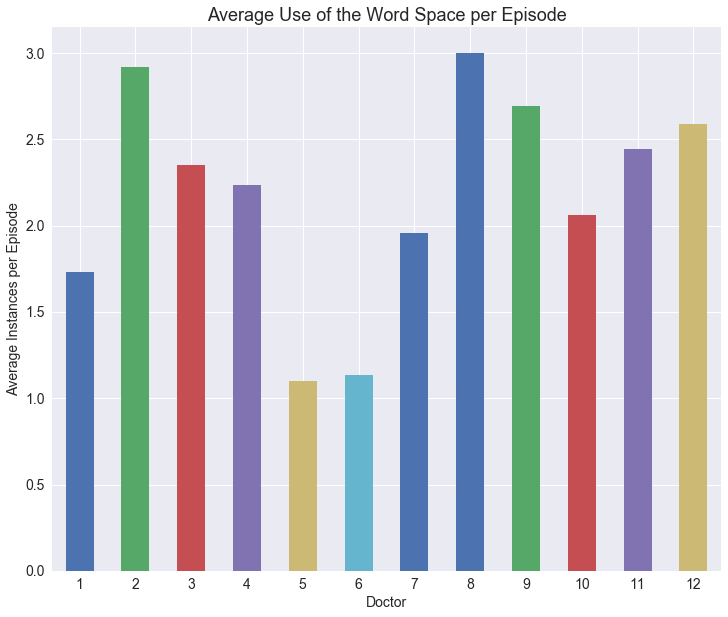

In [67]:
perbydoc['spacecount'].plot(kind='bar', figsize=(12,10), legend=False, fontsize=14)
plt.ylabel('Average Instances per Episode', fontsize=14)
plt.xlabel('Doctor', fontsize=14)
plt.xticks(rotation=0)
plt.title('Average Use of the Word Space per Episode', fontsize=18)

In [ ]:
perbydoc

In [65]:
perbydoc3 = perbydoc.drop(columns= ['scriptlength', 'episodes', 'soniccount', 'tardiscount', 'timecount', 'spacecount'])

TypeError: 'bool' object is not callable

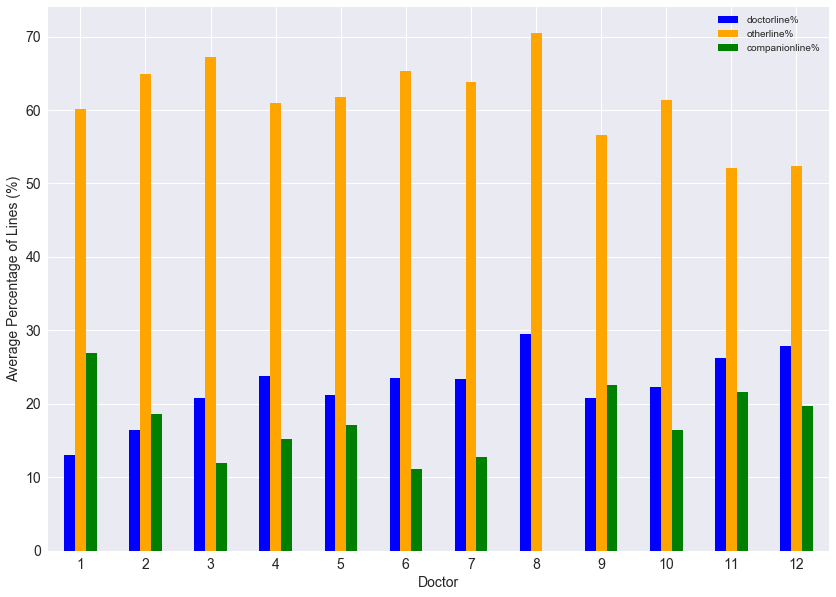

In [266]:
perbydoc3.plot(kind='bar', figsize=(14,10), color= ['blue', 'orange', 'green'], fontsize=14)
plt.ylabel('Average Percentage of Lines (%)', fontsize=14)
plt.xlabel('Doctor', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Doctor', 'Other', 'Companion'], fontsize=14)
plt.title('Average Line Percentages by Doctor', fontsize=18)

In [69]:
fulldata.linecounts

0      {'GIRL:': 1, 'BARBARA:': 133, 'BOY:': 1, 'IAN:...
1      {'DOCTOR:': 274, 'SUSAN:': 205, 'BARBARA:': 22...
2      {'BARBARA:': 120, 'SUSAN:': 90, 'IAN:': 105, '...
3      {'SUSAN:': 192, 'IAN:': 251, 'DOCTOR:': 230, '...
4      {'IAN:': 298, 'DOCTOR:': 183, 'BARBARA:': 308,...
5      {'BARBARA:': 173, 'SUSAN:': 60, 'AUTLOC:': 118...
6      {'IAN:': 222, 'DOCTOR:': 322, 'BARBARA:': 129,...
7      {'DOCTOR:': 229, 'BARBARA:': 195, 'SUSAN:': 99...
8      {'DOCTOR:': 177, 'IAN:': 177, 'BARBARA:': 140,...
9      {'DOCTOR:': 187, 'IAN:': 165, 'BARBARA:': 136,...
10     {'VICKI:': 91, 'BENNETT:': 31, 'CAPTAIN:': 6, ...
11     {'DOCTOR:': 194, 'IAN:': 132, 'BARBARA:': 122,...
12     {'DOCTOR:': 233, 'IAN:': 164, 'BARBARA:': 116,...
13     {'AKIR:': 49, 'RICHARD:': 75, 'MARUN:': 4, 'TO...
14     {'DOCTOR:': 152, 'IAN:': 154, 'BARBARA:': 108,...
15     {'DALEK1:': 53, 'DALEK2:': 64, 'DOCTOR:': 271,...
16     {'VICKI:': 150, 'DOCTOR:': 155, 'MONK:': 98, '...
17     {'VICKI:': 179, 'DOCTOR:

In [150]:
totalepisodecount['ROSE:']

32.0